In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import tensorflow as tf

In [3]:
# Data loaddings

from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
X_train = mnist.train.images
X_test = mnist.test.images
X_val = mnist.validation.images

In [6]:
y_train = mnist.train.labels
y_test = mnist.test.labels
y_val = mnist.validation.labels

In [7]:
X_train.shape

(55000, 784)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [9]:
# Placeholder

X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [10]:
# Variable

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [11]:
# Model hyper parameters
learning_rate = 0.01
batch_size = 128
nb_epochs = 100

In [12]:
# Define graph

logits = tf.matmul(X, W) + b
y_pred = tf.nn.softmax(logits=logits)

In [27]:
# Loss function

entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

loss = tf.reduce_mean(entropy)

correct_preds = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))

In [28]:
# Accuracy

accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [37]:
# Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [38]:
# Init variables

init = tf.global_variables_initializer()

In [39]:
sess = tf.Session()

In [40]:
sess.run(init)

In [41]:
# Training

nb_batch = X_train.shape[0] // batch_size

for i in range(nb_epochs):
    for _ in range(nb_batch):
        X_batch , y_batch = mnist.train.next_batch(batch_size=batch_size)
        _, batch_loss = sess.run([optimizer, loss], feed_dict={X : X_batch, y : y_batch})
        
    if i % 10 == 0:
        _, val_loss, val_accuracy = sess.run([optimizer, loss, accuracy], feed_dict={X : X_val, y : y_val})
        print("Epochs {} val_loss = {} val_accuracy = {}".format(i, val_loss, val_accuracy))

Epochs 0 val_loss = 0.839606523513794 val_accuracy = 0.8465999960899353
Epochs 10 val_loss = 0.3785005509853363 val_accuracy = 0.8992000222206116
Epochs 20 val_loss = 0.33478182554244995 val_accuracy = 0.909600019454956
Epochs 30 val_loss = 0.3152567744255066 val_accuracy = 0.9136000275611877


KeyboardInterrupt: 

In [42]:
_, test_loss, test_accuracy = sess.run([optimizer, loss, accuracy], feed_dict={X : X_test, y : y_test})
print("Epochs {} test_loss = {} test_accuracy = {}".format(i, test_loss, test_accuracy))

Epochs 35 test_loss = 0.3125869631767273 test_accuracy = 0.9143999814987183


In [51]:
import matplotlib.pyplot as plt

def show_result(X_true, y_true):
    plt.imshow(X_true.reshape(28, 28))
    print(np.argmax(y_true))
    y_preds = sess.run(y_pred, feed_dict={X : [X_true]})
    
    print(np.argmax(y_preds))

3
3


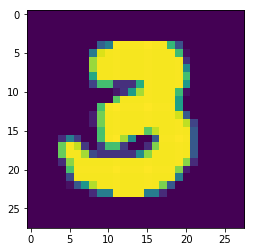

In [55]:
show_result(X_test[200], y_test[200])